# Use $\texttt{exoplanet}$ tutorial: https://gallery.exoplanet.codes/tutorials/stellar-variability/

In [1]:
import exoplanet

exoplanet.utils.docs_setup()
print(f"exoplanet.__version__ = '{exoplanet.__version__}'")

exoplanet.__version__ = '0.5.2'


## this is for quarter 3:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


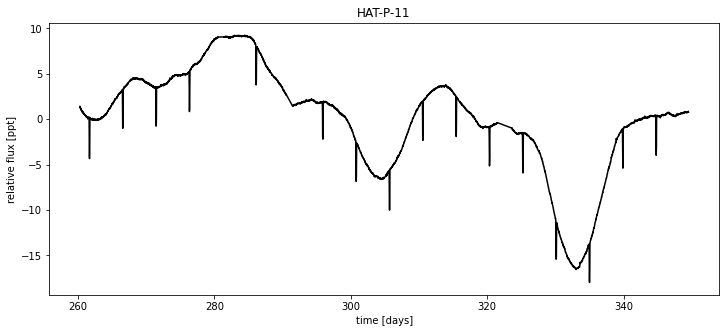

In [2]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

lcf = lk.search_lightcurve(
    "HAT-P-11", mission="Kepler", quarter=3, cadence='long'
).download()
lc = lcf.remove_nans()#.remove_outliers()
# lc = lc[:5000]
#_, mask = lc.flatten()#.remove_outliers(sigma=3.0, return_mask=True)
#lc = lc[~mask]

x = np.ascontiguousarray(lc.time.value, dtype=np.float64)
y = np.ascontiguousarray(lc.flux, dtype=np.float64)
yerr = np.ascontiguousarray(lc.flux_err, dtype=np.float64)
mu = np.mean(y)
y = (y / mu - 1) * 1e3
yerr = yerr * 1e3 / mu

plt.figure(figsize=(12,5))
plt.plot(x, y, "k")
# plt.xlim(x.min(), x.max())
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

In [3]:
period = np.linspace(1, 6, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_dur = bls.duration_at_max_power*1.5

# Check the value for period
planet_period

<Quantity 4.88838884 d>

In [4]:
tranmask = lc.create_transit_mask(transit_time=planet_t0.value, period=np.float64(planet_period), duration=np.float64(planet_dur))

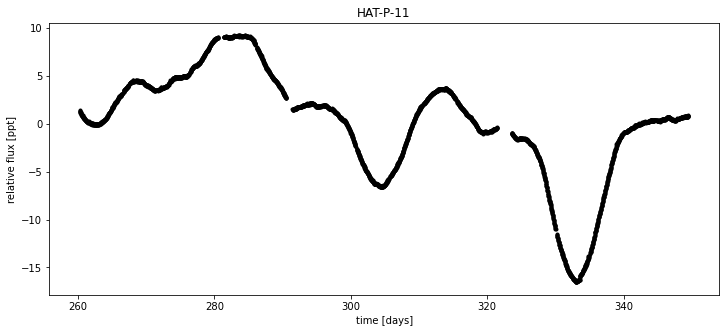

In [5]:
plt.figure(figsize=(12,5))
plt.plot(x[~tranmask], y[~tranmask], ".k")
# plt.plot(x, y, "r")
# plt.xlim(260, 270)
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

deleting values:
[261.67573446 261.69616763 261.71660091 261.73703398 261.75746716
 261.77790043 261.79833351 266.55925524 266.57968826 266.60012147
 266.62055459 266.64098761 266.66142083 266.68185395 271.44276339
 271.46319646 271.48362952 271.50406259 271.56536178 271.58579484
 276.32625914 276.34669216 276.38755819 276.4079912  276.42842422
 276.44885733 276.46929025 281.3527741  286.11364989 286.13408272
 286.15451575 286.17494867 286.1953815  286.21581442 286.23624745
 295.88056934 295.9010021  295.92143495 295.94186771 295.96230066
 295.98273352 296.00316637 296.02359922 300.78445012 300.80488305
 300.82531588 300.8457486  300.86618153 300.88661436 300.90704708
 305.66789231 305.68832511 305.70875792 305.72919072 305.74962342
 305.77005633 305.79048913 310.55132978 310.57176257 310.59219536
 310.61262815 310.63306093 310.65349362 310.67392641 315.43476404
 315.45519682 315.47562949 315.49606237 315.51649515 315.53692782
 315.5573606  315.57779348 320.33862909 320.35906186 320.37

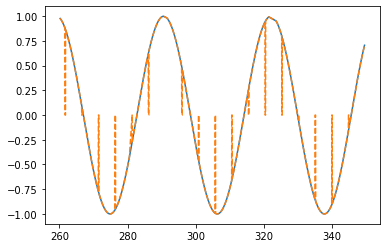

In [6]:
target = planet_t0.value
duration = np.float64(planet_dur)
period = np.float64(planet_period)

shifted = x - target
# find all values >= target and < target + duration, modulo period
bad_mask = (shifted >= 0) & (shifted % period <= duration)

print("deleting values:")
print(x[bad_mask])
cut = x[~bad_mask]

# illustrative example
data = np.sin(x / 5)
data_cut = data.copy()
data_cut[bad_mask] = 0
plt.plot(x, data, label="original")
plt.plot(x, data_cut, ls="--", label="cut")
plt.show()

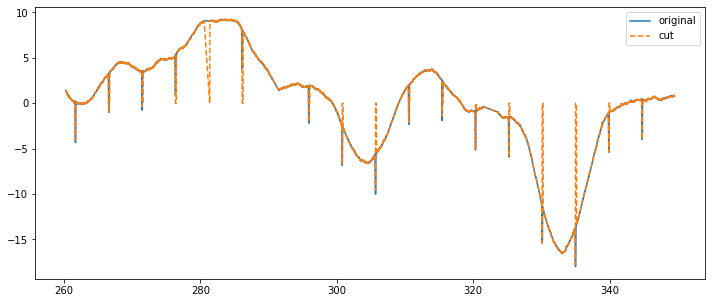

In [7]:
# illustrate
plt.figure(figsize=(12,5))
data_cut = y.copy()
data_cut[bad_mask] = 0
plt.plot(x, y, label="original")
plt.plot(x, data_cut, ls="--", label="cut")
plt.legend()
plt.show()

In [8]:
# x[~bad_mask] = np.nan
# y[~bad_mask] = np.nan
# yerr[~bad_mask] = np.nan

# x = x[~np.isnan(x)]
# y = y[~np.isnan(y)]
# yerr = yerr[~np.isnan(yerr)]

x = x[~tranmask]
y = y[~tranmask]
yerr = yerr[~tranmask]

In [9]:
yerr

array([0.01531046, 0.01531012, 0.01531298, ..., 0.01538186, 0.01538313,
       0.01537873])

In [10]:
x

array([260.24541191, 260.2658451 , 260.28627819, ..., 349.45537318,
       349.47580605, 349.49623892])

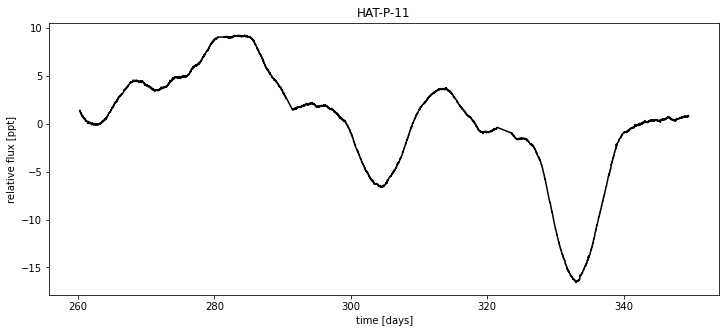

In [11]:
plt.figure(figsize=(12,5))
plt.plot(x, y, "k")
# plt.xlim(x.min(), x.max())
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

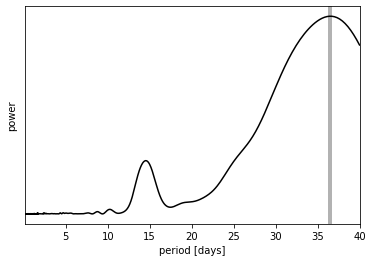

In [21]:
import exoplanet as xo

results = xo.estimators.lomb_scargle_estimator(
    x, y, max_peaks=1,min_period=0.1, max_period=40.0, samples_per_peak=50
)

peak = results["peaks"][0]
freq, power = results["periodogram"]
plt.plot(1 / freq, power, "k")
plt.axvline(peak["period"], color="k", lw=4, alpha=0.3)
plt.xlim((1 / freq).min(), (1 / freq).max())
plt.yticks([])
plt.xlabel("period [days]")
_ = plt.ylabel("power")


In [22]:
results

{'periodogram': (array([ 0.025     ,  0.02522409,  0.02544818, ...,  9.99958544,
          9.99980953, 10.00003362]),
  array([4.77020658e+00, 4.92496505e+00, 5.06325434e+00, ...,
         8.27317232e-06, 8.94026492e-06, 9.84276391e-06])),
 'peaks': [{'index': 12,
   'log_power': 1.7195695714987096,
   'period': 36.53146949044512,
   'period_uncert': 6.82417678324699}],
 'ls': <astropy.timeseries.periodograms.lombscargle.core.LombScargle at 0x18ab88400>}

In [23]:
peak

{'index': 12,
 'log_power': 1.7195695714987096,
 'period': 36.53146949044512,
 'period_uncert': 6.82417678324699}

In [24]:
import pymc3 as pm
import pymc3_ext as pmx
import aesara_theano_fallback.tensor as tt
from celerite2.theano import terms, GaussianProcess

In [25]:
with pm.Model() as model:

    # The mean flux of the time series
    mean = pm.Normal("mean", mu=0.0, sigma=10.0)

    # A jitter term describing excess white noise
    log_jitter = pm.Normal("log_jitter", mu=np.log(np.mean(yerr)), sigma=2.0)

    # A term to describe the non-periodic variability
    sigma = pm.InverseGamma(
        "sigma", **pmx.estimate_inverse_gamma_parameters(1.0, 5.0)
    )
    rho = pm.InverseGamma(
        "rho", **pmx.estimate_inverse_gamma_parameters(0.5, 2.0)
    )

    # The parameters of the RotationTerm kernel
    sigma_rot = pm.InverseGamma(
        "sigma_rot", **pmx.estimate_inverse_gamma_parameters(1.0, 5.0)
    )
    log_period = pm.Normal("log_period", mu=np.log(peak["period"]), sigma=2.0)
    period = pm.Deterministic("period", tt.exp(log_period))
    log_Q0 = pm.HalfNormal("log_Q0", sigma=2.0)
    log_dQ = pm.Normal("log_dQ", mu=0.0, sigma=2.0)
    f = pm.Uniform("f", lower=0.1, upper=1.0)

    # Set up the Gaussian Process model
    kernel = terms.SHOTerm(sigma=sigma, rho=rho, Q=1 / 3.0)
    kernel += terms.RotationTerm(
        sigma=sigma_rot,
        period=period,
        Q0=tt.exp(log_Q0),
        dQ=tt.exp(log_dQ),
        f=f,
    )
    gp = GaussianProcess(
        kernel,
        t=x,
        diag=yerr**2 + tt.exp(2 * log_jitter),
        mean=mean,
        quiet=True,
    )

    # Compute the Gaussian Process likelihood and add it into the
    # the PyMC3 model as a "potential"
    gp.marginal("gp", observed=y)

    # Compute the mean model prediction for plotting purposes
    pm.Deterministic("pred", gp.predict(y))

    # Optimize to find the maximum a posteriori parameters
    map_soln = pmx.optimize()

optimizing logp for variables: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


message: Desired error not necessarily achieved due to precision loss.
logp: 2558.2500312607553 -> nan
final logp not finite, returning initial point
this suggests that something is wrong with the model


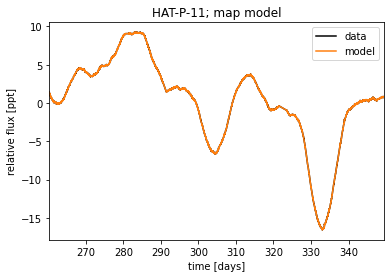

In [26]:
plt.plot(x, y, "k", label="data")
plt.plot(x, map_soln["pred"], color="C1", label="model")
plt.xlim(x.min(), x.max())
plt.legend(fontsize=10)
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11; map model")

In [27]:
with model:
    trace = pmx.sample(
        tune=1000,
        draws=1000,
        start=map_soln,
        cores=2,
        chains=2,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=[10863087, 10863088],
    )

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 189 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


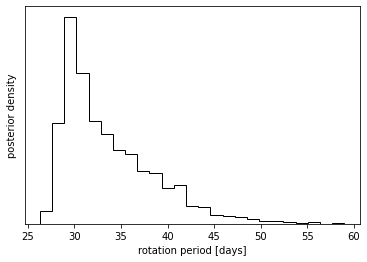

In [28]:
period_samples = np.asarray(trace.posterior["period"]).flatten()
plt.hist(period_samples, 25, histtype="step", color="k", density=True)
plt.yticks([])
plt.xlabel("rotation period [days]")
_ = plt.ylabel("posterior density")

## quarter 6

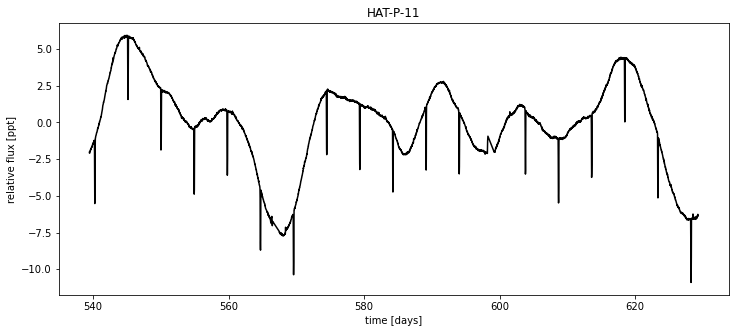

In [29]:
lcf = lk.search_lightcurve(
    "HAT-P-11", mission="Kepler", quarter=6, cadence='long'
).download()
lc = lcf.remove_nans()#.remove_outliers()
# lc = lc[:5000]
# _, mask = lc.flatten().remove_outliers(sigma=3.0, return_mask=True)
# lc = lc[~mask]

x = np.ascontiguousarray(lc.time.value, dtype=np.float64)
y = np.ascontiguousarray(lc.flux, dtype=np.float64)
yerr = np.ascontiguousarray(lc.flux_err, dtype=np.float64)
mu = np.mean(y)
y = (y / mu - 1) * 1e3
yerr = yerr * 1e3 / mu

plt.figure(figsize=(12,5))
plt.plot(x, y, "k")
# plt.xlim(x.min(), x.max())
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

In [30]:
period = np.linspace(1, 6, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_dur = bls.duration_at_max_power*1.5

# Check the value for period
planet_period

<Quantity 4.88638864 d>

In [31]:
tranmask = lc.create_transit_mask(transit_time=planet_t0.value, period=np.float64(planet_period), duration=np.float64(planet_dur))

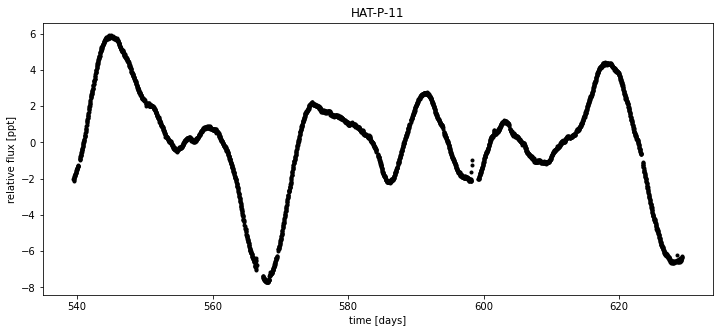

In [32]:
plt.figure(figsize=(12,5))
plt.plot(x[~tranmask], y[~tranmask], ".k")
# plt.xlim(x.min(), x.max())
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

In [33]:
x = x[~tranmask]
y = y[~tranmask]
yerr = yerr[~tranmask]

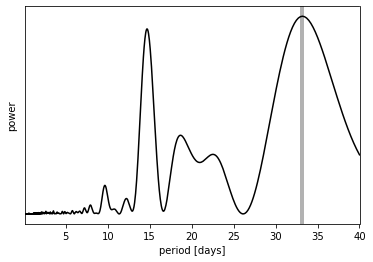

In [34]:
import exoplanet as xo

results = xo.estimators.lomb_scargle_estimator(
    x, y, max_peaks=1,min_period=0.1, max_period=40.0, samples_per_peak=50
)

peak = results["peaks"][0]
freq, power = results["periodogram"]
plt.plot(1 / freq, power, "k")
plt.axvline(peak["period"], color="k", lw=4, alpha=0.3)
plt.xlim((1 / freq).min(), (1 / freq).max())
plt.yticks([])
plt.xlabel("period [days]")
_ = plt.ylabel("power")

In [35]:
import pymc3 as pm
import pymc3_ext as pmx
import aesara_theano_fallback.tensor as tt
from celerite2.theano import terms, GaussianProcess

In [36]:
with pm.Model() as model:

    # The mean flux of the time series
    mean = pm.Normal("mean", mu=0.0, sigma=10.0)

    # A jitter term describing excess white noise
    log_jitter = pm.Normal("log_jitter", mu=np.log(np.mean(yerr)), sigma=2.0)

    # A term to describe the non-periodic variability
    sigma = pm.InverseGamma(
        "sigma", **pmx.estimate_inverse_gamma_parameters(1.0, 5.0)
    )
    rho = pm.InverseGamma(
        "rho", **pmx.estimate_inverse_gamma_parameters(0.5, 2.0)
    )

    # The parameters of the RotationTerm kernel
    sigma_rot = pm.InverseGamma(
        "sigma_rot", **pmx.estimate_inverse_gamma_parameters(1.0, 5.0)
    )
    log_period = pm.Normal("log_period", mu=np.log(peak["period"]), sigma=2.0)
    period = pm.Deterministic("period", tt.exp(log_period))
    log_Q0 = pm.HalfNormal("log_Q0", sigma=2.0)
    log_dQ = pm.Normal("log_dQ", mu=0.0, sigma=2.0)
    f = pm.Uniform("f", lower=0.1, upper=1.0)

    # Set up the Gaussian Process model
    kernel = terms.SHOTerm(sigma=sigma, rho=rho, Q=1 / 3.0)
    kernel += terms.RotationTerm(
        sigma=sigma_rot,
        period=period,
        Q0=tt.exp(log_Q0),
        dQ=tt.exp(log_dQ),
        f=f,
    )
    gp = GaussianProcess(
        kernel,
        t=x,
        diag=yerr**2 + tt.exp(2 * log_jitter),
        mean=mean,
        quiet=True,
    )

    # Compute the Gaussian Process likelihood and add it into the
    # the PyMC3 model as a "potential"
    gp.marginal("gp", observed=y)

    # Compute the mean model prediction for plotting purposes
    pm.Deterministic("pred", gp.predict(y))

    # Optimize to find the maximum a posteriori parameters
    map_soln = pmx.optimize()

optimizing logp for variables: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


message: Optimization terminated successfully.
logp: 3056.588254182301 -> 7088.518027520853


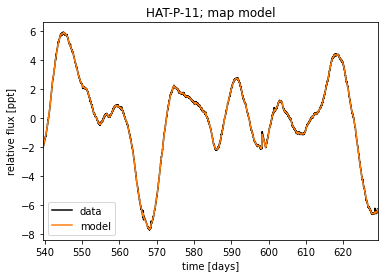

In [37]:
plt.plot(x, y, "k", label="data")
plt.plot(x, map_soln["pred"], color="C1", label="model")
plt.xlim(x.min(), x.max())
plt.legend(fontsize=10)
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11; map model")

In [38]:
with model:
    trace = pmx.sample(
        tune=1000,
        draws=1000,
        start=map_soln,
        cores=2,
        chains=2,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=[10863087, 10863088],
    )

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [f, log_dQ, log_Q0, log_period, sigma_rot, rho, sigma, log_jitter, mean]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 130 seconds.


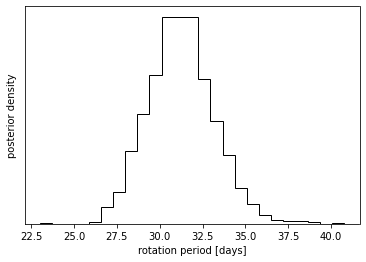

In [39]:
period_samples = np.asarray(trace.posterior["period"]).flatten()
plt.hist(period_samples, 25, histtype="step", color="k", density=True)
plt.yticks([])
plt.xlabel("rotation period [days]")
_ = plt.ylabel("posterior density")

In [111]:
yerr.shape

(4139,)

## $\texttt{celerite}$ prediction

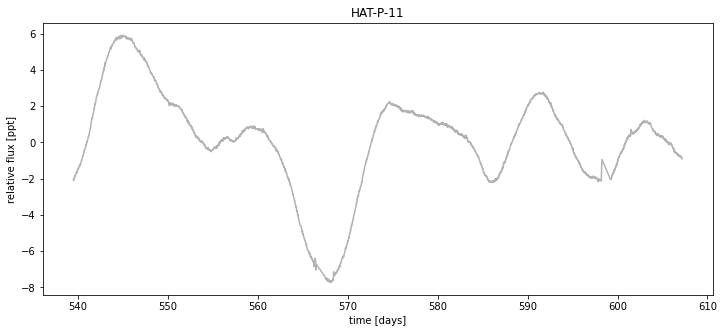

In [112]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

yerr = np.random.uniform(0.08, 0.52, len(x[:3105]))

true_t = x[:3105]
true_flux = y[:3105]
# yerr = yerr[:3105]
# yerr = np.ascontiguousarray(lc.flux_err, dtype=np.float64)
# mu = np.mean(true_flux)
# true_flux = (true_flux / mu - 1) * 1e3


plt.figure(figsize=(12,5))
plt.plot(true_t, true_flux, "k", lw=1.5, alpha=0.3)
# plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y")
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")


In [113]:
import celerite
from celerite import terms

# A non-periodic component
Q = 1.0 / np.sqrt(2.0)
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(-15, 15))
kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                       bounds=bounds)
kernel.freeze_parameter("log_Q")  # We don't want to fit for "Q" in this term

# A periodic component
Q = 1.0
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

In [114]:
gp = celerite.GP(kernel, mean=np.mean(y))
gp.compute(true_t, yerr)  # You always need to call compute once.
print("Initial log likelihood: {0}".format(gp.log_likelihood(true_flux)))

Initial log likelihood: -174.9116310736249


In [115]:
from scipy.optimize import minimize

def neg_log_like(params, y, gp):
    gp.set_parameter_vector(params)
    return -gp.log_likelihood(y)

initial_params = gp.get_parameter_vector()
bounds = gp.get_parameter_bounds()

r = minimize(neg_log_like, initial_params, method="L-BFGS-B", bounds=bounds, args=(true_flux, gp))
gp.set_parameter_vector(r.x)
print(r)

      fun: -934.6066551076019
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00190994, 0.0082764 , 0.0039563 , 0.0043201 , 0.02187335])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 198
      nit: 29
     njev: 33
   status: 0
  success: True
        x: array([ 3.22519678, -1.67935962,  0.4925161 ,  1.6749595 , -0.81494748])


In [116]:
gp.get_parameter_dict()

OrderedDict([('kernel:terms[0]:log_S0', 3.2251967797788814),
             ('kernel:terms[0]:log_omega0', -1.6793596221951563),
             ('kernel:terms[1]:log_S0', 0.4925160996991766),
             ('kernel:terms[1]:log_Q', 1.6749595021834418),
             ('kernel:terms[1]:log_omega0', -0.8149474797731138)])

In [117]:
x1 = np.linspace(540, 630, len(x))
pred_mean, pred_var = gp.predict(true_flux, x1, return_var=True)
pred_std = np.sqrt(pred_var)

In [118]:
true_t.max()

607.1877914598226

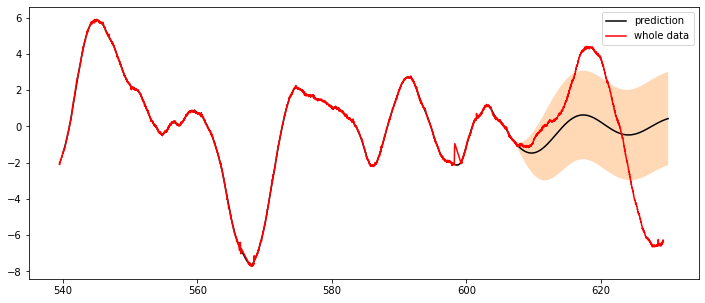

In [121]:
color = "#ff7f0e"
plt.figure(figsize=(12,5))
# plt.plot(true_t, true_flux, "k", lw=1.5,label = 'true data')
# plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x1, pred_mean, color='k',label = 'prediction')
plt.plot(x,y,'r',label="whole data")
plt.fill_between(x1, pred_mean+pred_std, pred_mean-pred_std, color=color, alpha=0.3,
                  edgecolor="none")
plt.legend()

In [127]:
len(x)-len(x)/4

3104.25

In [131]:
x[3104:]

array([607.18779146, 607.22865855, 607.24909195, ..., 629.23538612,
       629.25581944, 629.29668578])

## train on 1/4 and 4/4

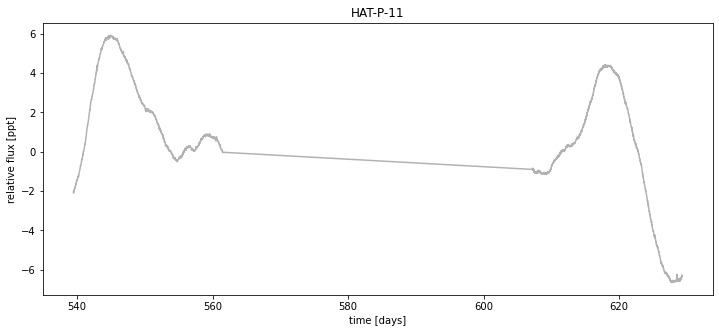

In [133]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

true_t = np.concatenate((x[:1035],x[3104:]))
true_flux = np.concatenate((y[:1035],y[3104:]))
yerr = np.random.uniform(0.08, 0.52, len(true_t))
# yerr = yerr[:3105]
# yerr = np.ascontiguousarray(lc.flux_err, dtype=np.float64)
# mu = np.mean(true_flux)
# true_flux = (true_flux / mu - 1) * 1e3


plt.figure(figsize=(12,5))
plt.plot(true_t, true_flux, "k", lw=1.5, alpha=0.3)
# plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y")
plt.xlabel("time [days]")
plt.ylabel("relative flux [ppt]")
_ = plt.title("HAT-P-11")

In [134]:
import celerite
from celerite import terms

# A non-periodic component
Q = 1.0 / np.sqrt(2.0)
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
bounds = dict(log_S0=(-15, 15), log_Q=(-15, 15), log_omega0=(-15, 15))
kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                       bounds=bounds)
kernel.freeze_parameter("log_Q")  # We don't want to fit for "Q" in this term

# A periodic component
Q = 1.0
w0 = 3.0
S0 = np.var(y) / (w0 * Q)
kernel += terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0),
                        bounds=bounds)

In [135]:
gp = celerite.GP(kernel, mean=np.mean(y))
gp.compute(true_t, yerr)  # You always need to call compute once.
print("Initial log likelihood: {0}".format(gp.log_likelihood(true_flux)))

Initial log likelihood: -113.36694149759683


In [136]:
from scipy.optimize import minimize

def neg_log_like(params, y, gp):
    gp.set_parameter_vector(params)
    return -gp.log_likelihood(y)

initial_params = gp.get_parameter_vector()
bounds = gp.get_parameter_bounds()

r = minimize(neg_log_like, initial_params, method="L-BFGS-B", bounds=bounds, args=(true_flux, gp))
gp.set_parameter_vector(r.x)
print(r)

      fun: -636.4228142301872
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00081855, -0.00045475, -0.08831194, -0.05734364, -0.33905963])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 330
      nit: 41
     njev: 55
   status: 0
  success: True
        x: array([-3.36043595, -2.06645059,  2.28790712,  1.11883465, -1.17619218])


In [137]:
x1 = np.linspace(540, 630, len(x))
pred_mean, pred_var = gp.predict(true_flux, x1, return_var=True)
pred_std = np.sqrt(pred_var)

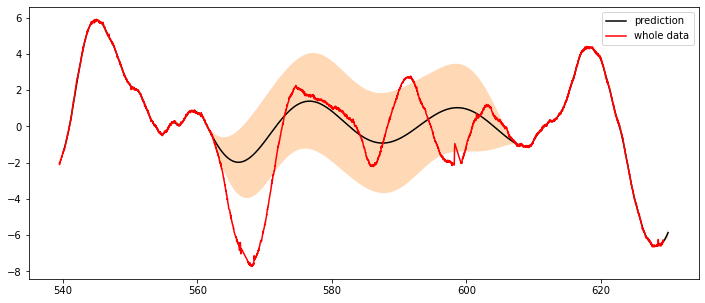

In [138]:
color = "#ff7f0e"
plt.figure(figsize=(12,5))
# plt.plot(true_t, true_flux, "k", lw=1.5,label = 'true data')
# plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x1, pred_mean, color='k',label = 'prediction')
plt.plot(x,y,'r',label="whole data")
plt.fill_between(x1, pred_mean+pred_std, pred_mean-pred_std, color=color, alpha=0.3,
                  edgecolor="none")
plt.legend()